In [672]:
import nltk
import matplotlib.pyplot as plt
import re 
import string
import pandas as pd
from nltk.corpus import stopwords , wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize , pos_tag
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer , util
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import umap.umap_ as umap
import seaborn as sns
import networkx as nx
import numpy as np
import streamlit as st

1) preproccing
2) ngrams
3) vectoize :
   bow
   tfidf
   wordembeding :
   1) wordtovec
   2) glove

In [400]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SEYED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [401]:
punctoation = string.punctuation.replace ("'" , "")
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

In [402]:
def get_wordnet_pos (tag) :
    if tag.startswith == "J":
        return wordnet.ADJ
    elif tag.startswith == "N":
        return wordnet.NOUN
    elif tag.startswith == "V":
        return wordnet.VERB
    elif tag.startswith == "R":
        return wordnet.ADV
    else :
        return wordnet.NOUN
        

In [403]:
with open (r"C:\Users\SEYED\Desktop\text.txt" , "r") as file :
    note2= file.read()

In [680]:
note = [
    "Natural Language Processing is a branch of AI.",
    "AI is transforming the world.",
    "NLP deals with human language."
]

1) preproccsing def

In [682]:
# lower 
#del space
#del punctuation
# del stop words
#tokenize
# stem , lemmatize
def preprocceing_text (text):
    try:
        text = text.lower()
        text = re.sub(rf"[{re.escape(punctoation)}]" , " " , text)
        text = " ".join(text.split())
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words ]
        tag = pos_tag(tokens)
        lemma = [lemmatizer.lemmatize(word , get_wordnet_pos(pos)) for word , pos in tag] 
        return lemma
    except Exception as error:
        print(f"error is : {error}")
        return []
    

2) ngrams

In [684]:
tokens = preprocceing_text(note2) 

In [686]:
print(tokens)

['woke', 'early', 'today', 'sky', 'sunny', 'ate', 'bread', 'cheese', 'breakfast', 'went', 'school', 'saw', 'friend', 'ali', 'played', 'football', 'together']


for string or file

In [688]:
def generated_ngrams (tokens , n):
    return list(ngrams(tokens , n))

In [690]:
bigram = generated_ngrams(tokens , 2)
trigram = generated_ngrams(tokens , 3)

In [692]:
bigram

[('woke', 'early'),
 ('early', 'today'),
 ('today', 'sky'),
 ('sky', 'sunny'),
 ('sunny', 'ate'),
 ('ate', 'bread'),
 ('bread', 'cheese'),
 ('cheese', 'breakfast'),
 ('breakfast', 'went'),
 ('went', 'school'),
 ('school', 'saw'),
 ('saw', 'friend'),
 ('friend', 'ali'),
 ('ali', 'played'),
 ('played', 'football'),
 ('football', 'together')]

In [414]:
trigram

[('woke', 'early', 'today'),
 ('early', 'today', 'sky'),
 ('today', 'sky', 'sunny'),
 ('sky', 'sunny', 'ate'),
 ('sunny', 'ate', 'bread'),
 ('ate', 'bread', 'cheese'),
 ('bread', 'cheese', 'breakfast'),
 ('cheese', 'breakfast', 'went'),
 ('breakfast', 'went', 'school'),
 ('went', 'school', 'saw'),
 ('school', 'saw', 'friend'),
 ('saw', 'friend', 'ali'),
 ('friend', 'ali', 'played'),
 ('ali', 'played', 'football'),
 ('played', 'football', 'together')]

for dict

In [694]:
def generated_bigrams (dict1):
    all_bigrams = []
    for text in dict1:
        tokens = preprocceing_text(text)
        bigram = ngrams(tokens , 2)
        join = [" ".join(gram) for gram in bigram]
        all_bigrams.append(join)
    return all_bigrams

In [696]:
 generated_bigrams(note)

[['natural language', 'language processing', 'processing branch', 'branch ai'],
 ['ai transforming', 'transforming world'],
 ['nlp deal', 'deal human', 'human language']]

most common ngram

In [419]:
def top_ngrams (text , n=10):
    try :
        for gram in bigram2 :
            top = []
            bigram_counter = Counter(gram)
        #trigram_counter = Counter (trigram)
            print(f"\ntop {n} bigram :")
            for gram , count in bigram_counter.most_common(n) :
                print (f"{gram} : {count}")
        #print(f"\ntop {n} trigram :")
        #for gram , count in trigram_counter.most_common(n) :
           # print (f"{gram} : {count}")
    except Exception as error:
        print(f"error is : {error}")
        return []

In [420]:
top_ngrams(note , 2)

error is : name 'bigram2' is not defined


[]

In [421]:
note = [ preprocceing_text(text) for text in note]
note

[['natural', 'language', 'processing', 'branch', 'ai'],
 ['ai', 'transforming', 'world'],
 ['nlp', 'deal', 'human', 'language']]

3) vecotize

In [423]:
#bagofword
vectorizer = CountVectorizer(
    analyzer="word" ,
    tokenizer= lambda x :x ,
    preprocessor= lambda x : x ,
    lowercase=False)
bow_matrix = vectorizer.fit_transform(note)

C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [424]:
#show
#1
bow_matrix.toarray()

array([[1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [425]:
#2
df = pd.DataFrame(bow_matrix.toarray() , columns= vectorizer.get_feature_names_out())
df

,ai,branch,deal,human,language,natural,nlp,processing,transforming,world
0,1,1,0,0,1,1,0,1,0,0
1,1,0,0,0,0,0,0,0,1,1
2,0,0,1,1,1,0,1,0,0,0


In [426]:
#tfidf
vectorizer_tf = TfidfVectorizer(
    analyzer="word" ,
    tokenizer= lambda x :x ,
    preprocessor= lambda x : x ,
    lowercase=False)
tfidf_matrix = vectorizer_tf.fit_transform(note)

C:\Users\SEYED\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [427]:
#show
#1
tfidf_matrix.toarray()

array([[0.37302199, 0.49047908, 0.        , 0.        , 0.37302199,
        0.49047908, 0.        , 0.49047908, 0.        , 0.        ],
       [0.4736296 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.62276601, 0.62276601],
       [0.        , 0.        , 0.52863461, 0.52863461, 0.40204024,
        0.        , 0.52863461, 0.        , 0.        , 0.        ]])

In [428]:
#2
df2 = pd.DataFrame(tfidf_matrix.toarray() , columns= vectorizer_tf.get_feature_names_out())
df2

,ai,branch,deal,human,language,natural,nlp,processing,transforming,world
0,0.373022,0.490479,0.000000,0.000000,0.373022,0.490479,0.000000,0.490479,0.000000,0.000000
1,0.473630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.622766,0.622766
2,0.000000,0.000000,0.528635,0.528635,0.402040,0.000000,0.528635,0.000000,0.000000,0.000000


In [429]:
#wordtovec
model = Word2Vec(
    sentences= note,
    vector_size= 50 ,
    window=5 ,
    min_count=1 ,
    workers=4
)

In [430]:
#similarity bitwin two word
print(model.wv.similarity("ai" , "human"))

0.12670165


In [431]:
#similar other words to the word by percentage
print(model.wv.most_similar("ai"))

[('branch', 0.13204392790794373), ('human', 0.12670163810253143), ('natural', 0.09984554350376129), ('language', 0.042373012751340866), ('world', 0.012442165985703468), ('deal', -0.014475265517830849), ('processing', -0.0560765340924263), ('transforming', -0.059746477752923965), ('nlp', -0.11821283400058746)]


In [432]:
#show index
print(model.wv.index_to_key)

['ai', 'language', 'human', 'deal', 'nlp', 'world', 'transforming', 'branch', 'processing', 'natural']


In [433]:
#odd one out
print(model.wv.doesnt_match(["ai" , "human" , "nlp"]))

ai


In [434]:
# vector
print(model.wv["ai"])

[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [435]:
words = model.wv.index_to_key
word_vector = [model.wv[word] for word in words]

In [436]:
pca = PCA(n_components=2)
vector_2d = pca.fit_transform(word_vector)

<function matplotlib.pyplot.show(close=None, block=None)>

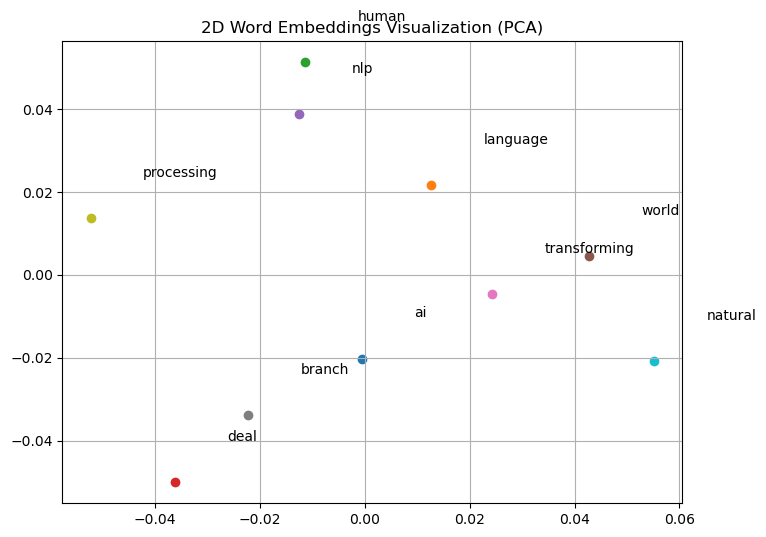

In [437]:
plt.figure(figsize=(8,6))
for i , word in enumerate(words):
    x , y = vector_2d[i]
    plt.scatter(x,y)
    plt.text(x+0.01 , y+0.01 , word)
plt.title("2D Word Embeddings Visualization (PCA)")
plt.grid(True)
plt.show

In [532]:
sentences2 = [
    "I love playing football.",
    "Soccer is a fun sport to play.",
    "The weather is sunny today.",
    "He enjoys watching football games.",
    "It is raining outside."
]

In [439]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [440]:
sentences = [
    "Natural Language Processing is a branch of AI.",
    "AI is transforming the world.",
    "NLP deals with human language.",
    "I love programming.",
    "The weather is nice today."
]

In [441]:
sentence_embeding = model.encode(sentences2)

In [442]:
sentence_embeding.shape

(5, 768)

In [443]:
reduced_vector = pca.fit_transform(sentence_embeding)

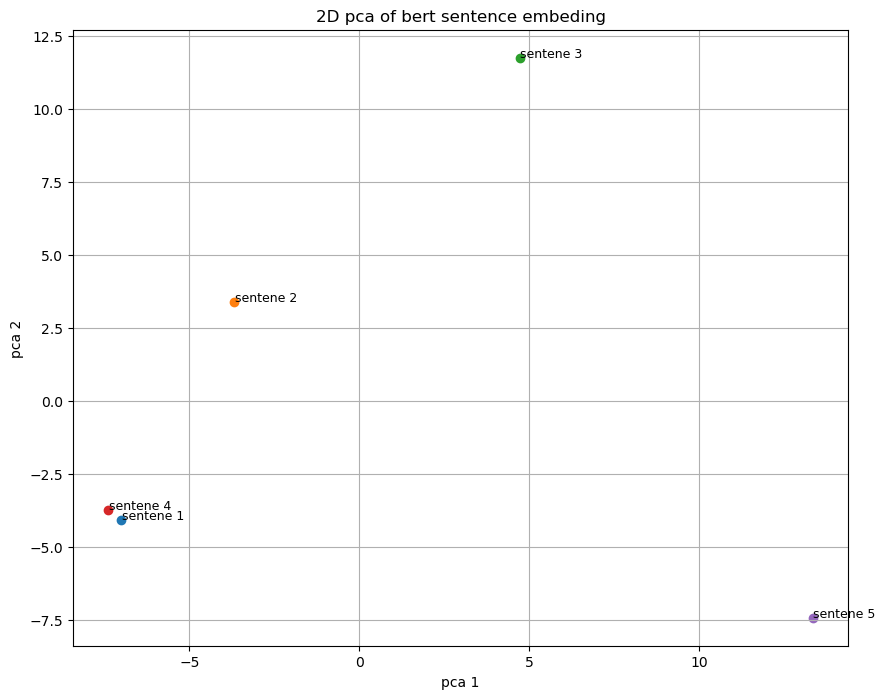

In [444]:
plt.figure(figsize=(10,8))
for i , sentene in enumerate(sentences):
    x,y = reduced_vector[i]
    plt.scatter(x,y)
    plt.annotate(f"sentene {i+1}" , (x+0.01 , y+0.01) , fontsize = 9)
    plt.title("2D pca of bert sentence embeding")
    plt.xlabel("pca 1")
    plt.ylabel("pca 2")
    plt.grid(True)
    plt.show

In [445]:
similarity_matrix = cosine_similarity(sentence_embeding)

In [446]:
len(similarity_matrix)

5

In [447]:
df_sim = pd.DataFrame(similarity_matrix , index = sentences2 , columns= sentences2)
print(df_sim.round(2))

                                                    I love playing football.  \
I love playing football.                                                1.00   
Soccer is a fun sport to play.                                          0.59   
Today the weather is nice and sunny with no clo...                      0.28   
He enjoys watching football games.                                      0.78   
Outside, it's cloudy and raining heavily.                               0.21   

                                                    Soccer is a fun sport to play.  \
I love playing football.                                                      0.59   
Soccer is a fun sport to play.                                                1.00   
Today the weather is nice and sunny with no clo...                            0.45   
He enjoys watching football games.                                            0.56   
Outside, it's cloudy and raining heavily.                                     0.19   

  

In [448]:
tsne = TSNE(n_components=2 , perplexity=4 , random_state=42)
tsne_result = tsne.fit_transform(sentence_embeding)

<function matplotlib.pyplot.show(close=None, block=None)>

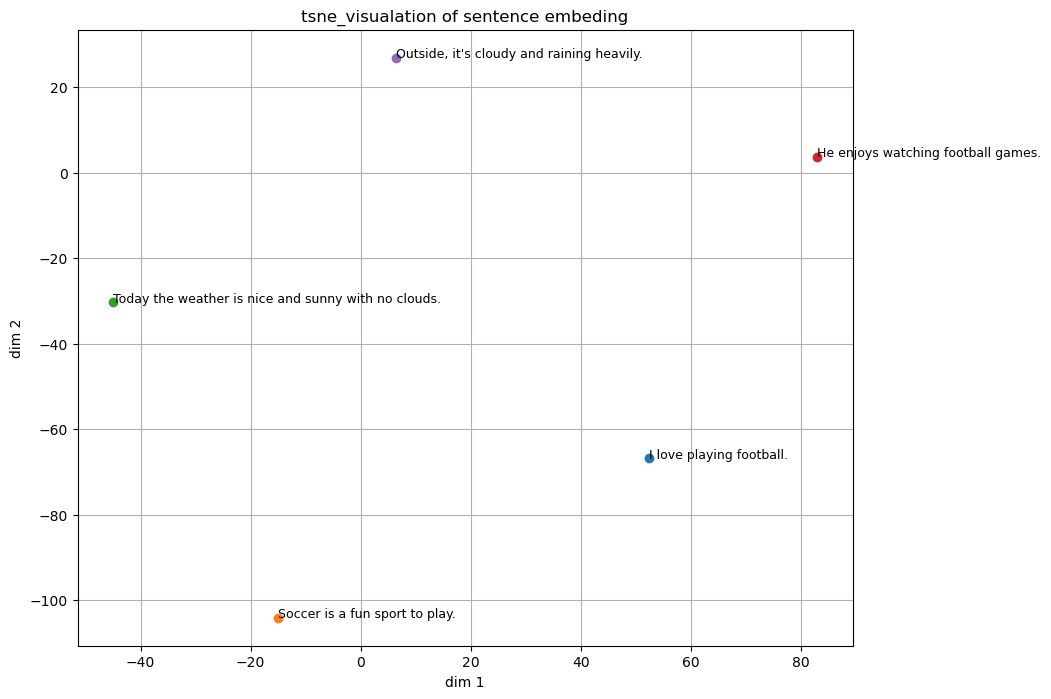

In [449]:
plt.figure(figsize=(10,8))
for i , (x,y) in enumerate(tsne_result) :
    plt.scatter(x,y)
    plt.text(x+0.02 , y+0.02 ,sentences2[i], fontsize = 9)
plt.title("tsne_visualation of sentence embeding")
plt.xlabel("dim 1")
plt.ylabel("dim 2")
plt.grid(True)
plt.show

In [450]:
reducer = umap.UMAP(n_components=2 , random_state=42)
umap_result = reducer.fit_transform(sentence_embeding)

C:\Users\SEYED\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\SEYED\anaconda3\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


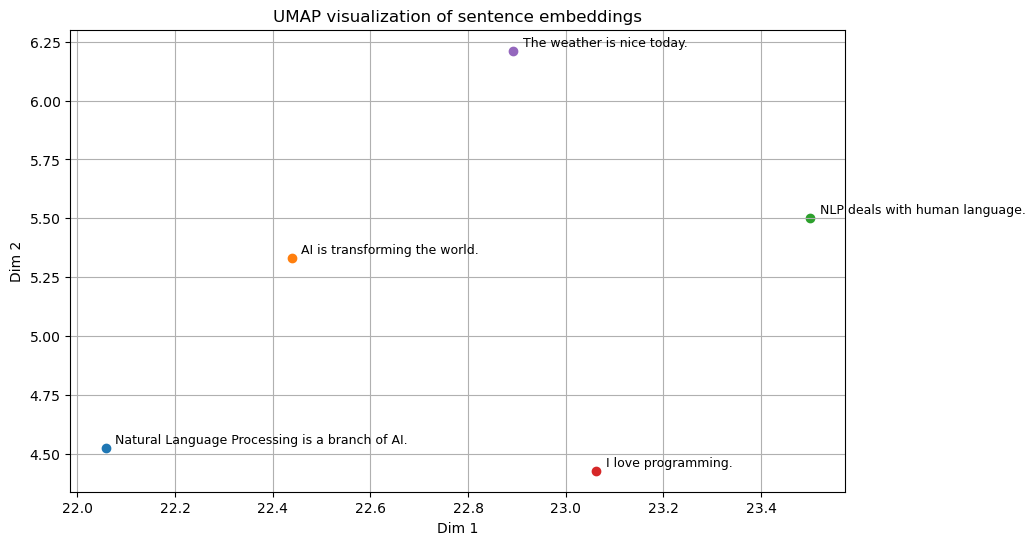

In [451]:
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(umap_result):
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, sentences[i], fontsize=9)
plt.title("UMAP visualization of sentence embeddings")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

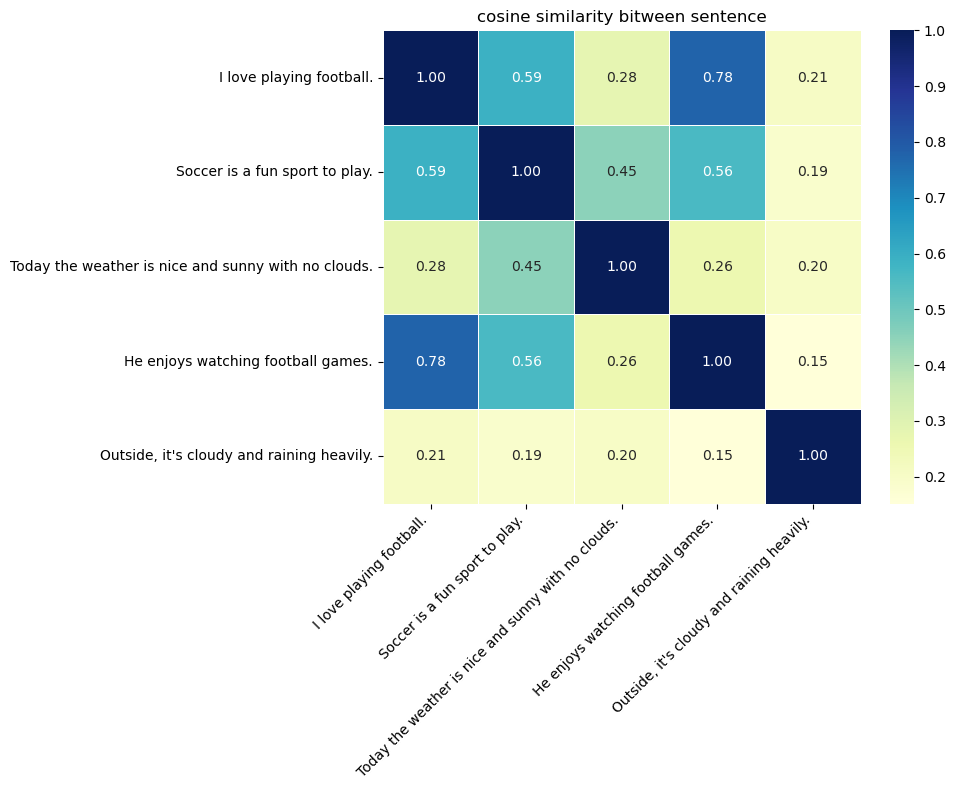

In [452]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sim , annot=True , cmap="YlGnBu" , fmt=".2f" , linewidths=0.5)
plt.title("cosine similarity bitween sentence")
plt.xticks(rotation = 45 , ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [453]:
G = nx.Graph()

In [454]:
for idx , sentence in enumerate(sentences2):
    G.add_node(idx , label= sentence)

In [455]:
threshold = 0.19
for i in range(len(similarity_matrix)):
    for j in range(i+1 , len(similarity_matrix)):
        sim_score = similarity_matrix[i][j]
        if sim_score>threshold :
            G.add_edge(i,j , weight = sim_score)

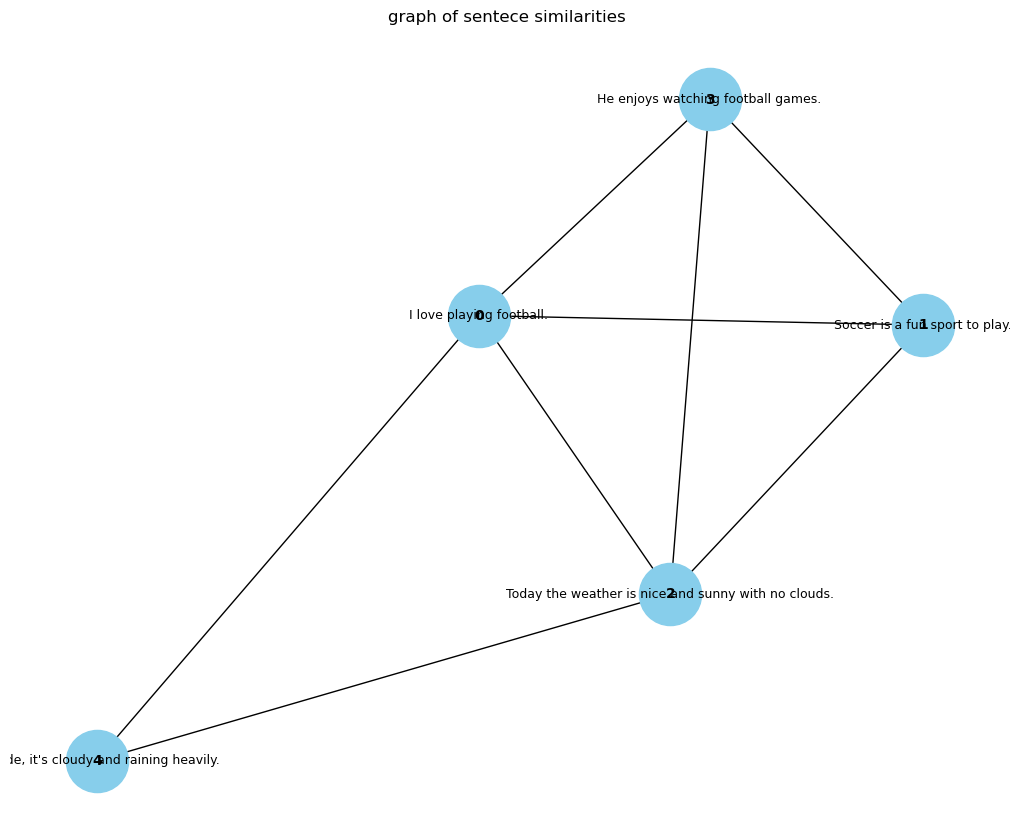

In [456]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G , k=0.5)
nx.draw(G , pos , with_labels = True , node_size = 2000 , node_color = "skyblue" , font_size = 10 , font_weight = "bold")
labels = nx.get_node_attributes(G , "label")
nx.draw_networkx_labels(G , pos  , labels , font_size=9)
plt.title("graph of sentece similarities ")
plt.show()

In [457]:
s1="Today the weather is nice and sunny with no clouds."
s2= "Outside, it's cloudy and raining heavily."
model2 = SentenceTransformer("bert-base-nli-mean-tokens")
embeding2 = model2.encode([s1 , s2])
similarity = util.cos_sim(embeding2[0] , embeding2[1])
print(similarity.item())

0.20355373620986938


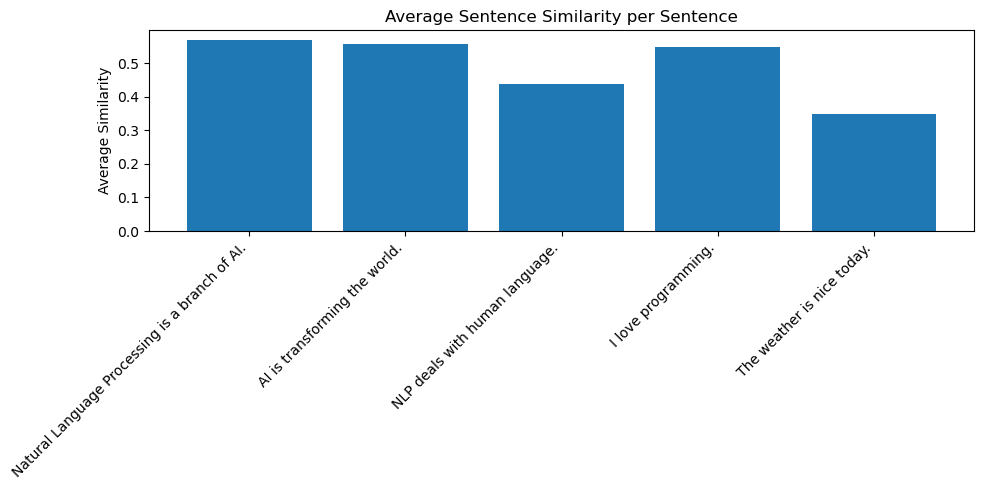

In [458]:


avg_similarities = similarity_matrix.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.bar(range(len(sentences)), avg_similarities)
plt.xticks(range(len(sentences)), sentences, rotation=45, ha="right")
plt.ylabel("Average Similarity")
plt.title("Average Sentence Similarity per Sentence")
plt.tight_layout()
plt.show()


In [459]:
from sentence_transformers import SentenceTransformer

models = {
    'BERT': 'bert-base-nli-mean-tokens',
    'MiniLM': 'sentence-transformers/all-MiniLM-L6-v2',
    'DistilBERT': 'sentence-transformers/distilbert-base-nli-stsb-mean-tokens'
}

for name, model_name in models.items():
    model = SentenceTransformer(model_name)
    embeddings = model.encode(sentences)
    sim_matrix = cosine_similarity(embeddings)
    avg_sim = sim_matrix[np.triu_indices(len(sentences), k=1)].mean()
    print(f"{name}: Avg Similarity = {avg_sim:.3f}")


BERT: Avg Similarity = 0.447
MiniLM: Avg Similarity = 0.232
DistilBERT: Avg Similarity = 0.267


In [530]:
model3 = SentenceTransformer('all-mpnet-base-v2')

In [461]:
embedings = model3.encode(sentences2 , convert_to_tensor=True)

In [462]:
cos_sim_matrix = util.cos_sim(embeddings , embeddings).cpu().numpy()


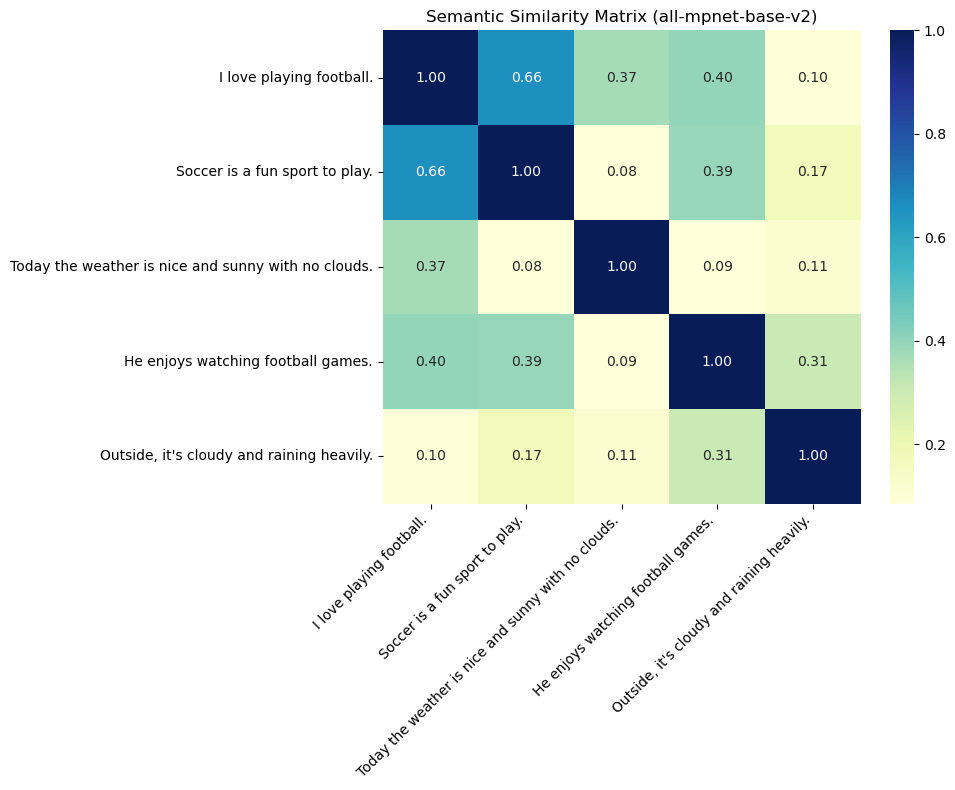

In [463]:
plt.figure(figsize=(10,8))
sns.heatmap(cos_sim_matrix , xticklabels=sentences2 , yticklabels=sentences2 , cmap = "YlGnBu" , annot=True , fmt = ".2f")
plt.title("Semantic Similarity Matrix (all-mpnet-base-v2)")
plt.xticks(rotation = 45 , ha = "right")
plt.tight_layout()
plt.show()

In [536]:
query = "I like rainy weather."

In [556]:
sentence_embedding = model3.encode(sentences2 , convert_to_tensor=True)
query_embeding =model3.encode(query , convert_to_tensor=True)

In [638]:
cos_score = util.cos_sim(query_embeding ,sentence_embedding )[0]

In [648]:

cos_score = np.array(cos_score)


In [650]:
top_result = np.argsort(cos_score)[::-1]

In [660]:
print(f"\nQuery {query}\nMost similar sentence :")
for idx in top_result[:3]:
    print(f"{sentences2[idx]} ( score : {cos_score[idx]:.2f})")


Query I like rainy weather.
Most similar sentence :
It is raining outside. ( score : 0.50)
I love playing football. ( score : 0.32)
Soccer is a fun sport to play. ( score : 0.21)


In [662]:
sentences3 = [
    "I love playing football.",
    "Soccer is a fun sport to play.",
    "The weather is sunny today.",
    "He enjoys watching football games.",
    "It is raining outside.",
    "I prefer rainy days.",
    "Today is a cold and wet day."
]

In [664]:
sentence_embeding3 = model3.encode(sentences3 , convert_to_tensor=True)

In [666]:
def semantic_search (query , top_k=3):
    query_embeding = model3.encode(query , convert_to_tensor=True)
    cos_score = util.cos_sim(query_embeding , sentence_embeding3)[0]
    cos_score = np.array(cos_score)
    top_result = np.argsort(cos_score)[::-1][:top_k]
    print(f"\nQuery {query} \nTop {top_k} similar sentence :")
    for idx in top_result :
        print(f"{sentences3[idx]} (score : {cos_score[idx] : .4f})")
    
    

In [ ]:
while True:
    user_query= input("\nEnter your search query (or 'exit' to quit):")
    if user_query.lower()=="exit":
        break
    semantic_search(user_query)

In [674]:
st.title("Semsantic Search With Sentence Embeddings")
query = st.text_input("Enter your query sentence:")
top_k = st.slider("Number of result to show" , min_value= 1 , max_value= 10 , value=3)
if query:
    query_embeding = model3.encode(query , convert_to_tensor=True)
    cos_score = util.cos_sim(query_embeding , sentence_embeding3)[o]
    cos_score = np.array(cos_score)
    top_result = np.argsort(cos_score)[::-1][:top_k]
    st.write(f"Top {top_k} similar sentence :")
    for idx in top_result :
        st.write(f" - {sentences3[idx]} (score : {cos_score[idx]:.4f})")

2025-06-05 09:07:17.175 
  command:

    streamlit run C:\Users\SEYED\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-05 09:07:17.175 Session state does not function when running a script without `streamlit run`
